## Final Grade Regression Problem ##

In [141]:
# loading in new student data file
data = pd.read_csv('df_growth.csv')

data

,Unnamed: 0,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,...,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,growth
0,0,18,4,4,2,2,0,4,3,4,...,0,1,0,0,0,1,1,0,0,11
1,1,17,1,1,1,2,0,5,3,3,...,0,0,1,0,0,0,1,1,0,2
2,2,15,1,1,1,2,0,4,3,2,...,0,1,0,0,0,1,1,1,0,1
3,3,15,4,2,1,3,0,3,2,2,...,0,0,1,0,1,1,1,1,1,0
4,4,16,3,3,1,2,0,4,3,2,...,0,0,1,0,0,1,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1039,20,2,2,1,2,2,5,5,4,...,1,0,1,1,0,1,1,0,0,0
1040,1040,17,3,1,2,1,0,2,4,5,...,0,0,0,0,0,0,1,1,0,2
1041,1041,21,1,1,1,1,3,5,5,3,...,1,0,0,0,0,0,1,0,0,-2
1042,1042,18,3,2,3,1,0,4,4,1,...,0,0,0,0,0,0,1,1,0,1


In [142]:
# dropping the G1 and G2 columns
#data = data.drop(columns = ['G1', 'G2'])

data = data.drop(columns = ['Unnamed: 0'])

# renaming the G3 column to final_grade
#data = data.rename(columns = {'G3': 'final_grade'})

In [143]:
# dummy encoding the categorical variables
student_data = pd.get_dummies(data, drop_first = True).astype(int)

student_data




,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,growth
0,18,4,4,2,2,0,4,3,4,1,...,0,1,0,0,0,1,1,0,0,11
1,17,1,1,1,2,0,5,3,3,1,...,0,0,1,0,0,0,1,1,0,2
2,15,1,1,1,2,0,4,3,2,2,...,0,1,0,0,0,1,1,1,0,1
3,15,4,2,1,3,0,3,2,2,1,...,0,0,1,0,1,1,1,1,1,0
4,16,3,3,1,2,0,4,3,2,1,...,0,0,1,0,0,1,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,20,2,2,1,2,2,5,5,4,4,...,1,0,1,1,0,1,1,0,0,0
1040,17,3,1,2,1,0,2,4,5,3,...,0,0,0,0,0,0,1,1,0,2
1041,21,1,1,1,1,3,5,5,3,3,...,1,0,0,0,0,0,1,0,0,-2
1042,18,3,2,3,1,0,4,4,1,3,...,0,0,0,0,0,0,1,1,0,1


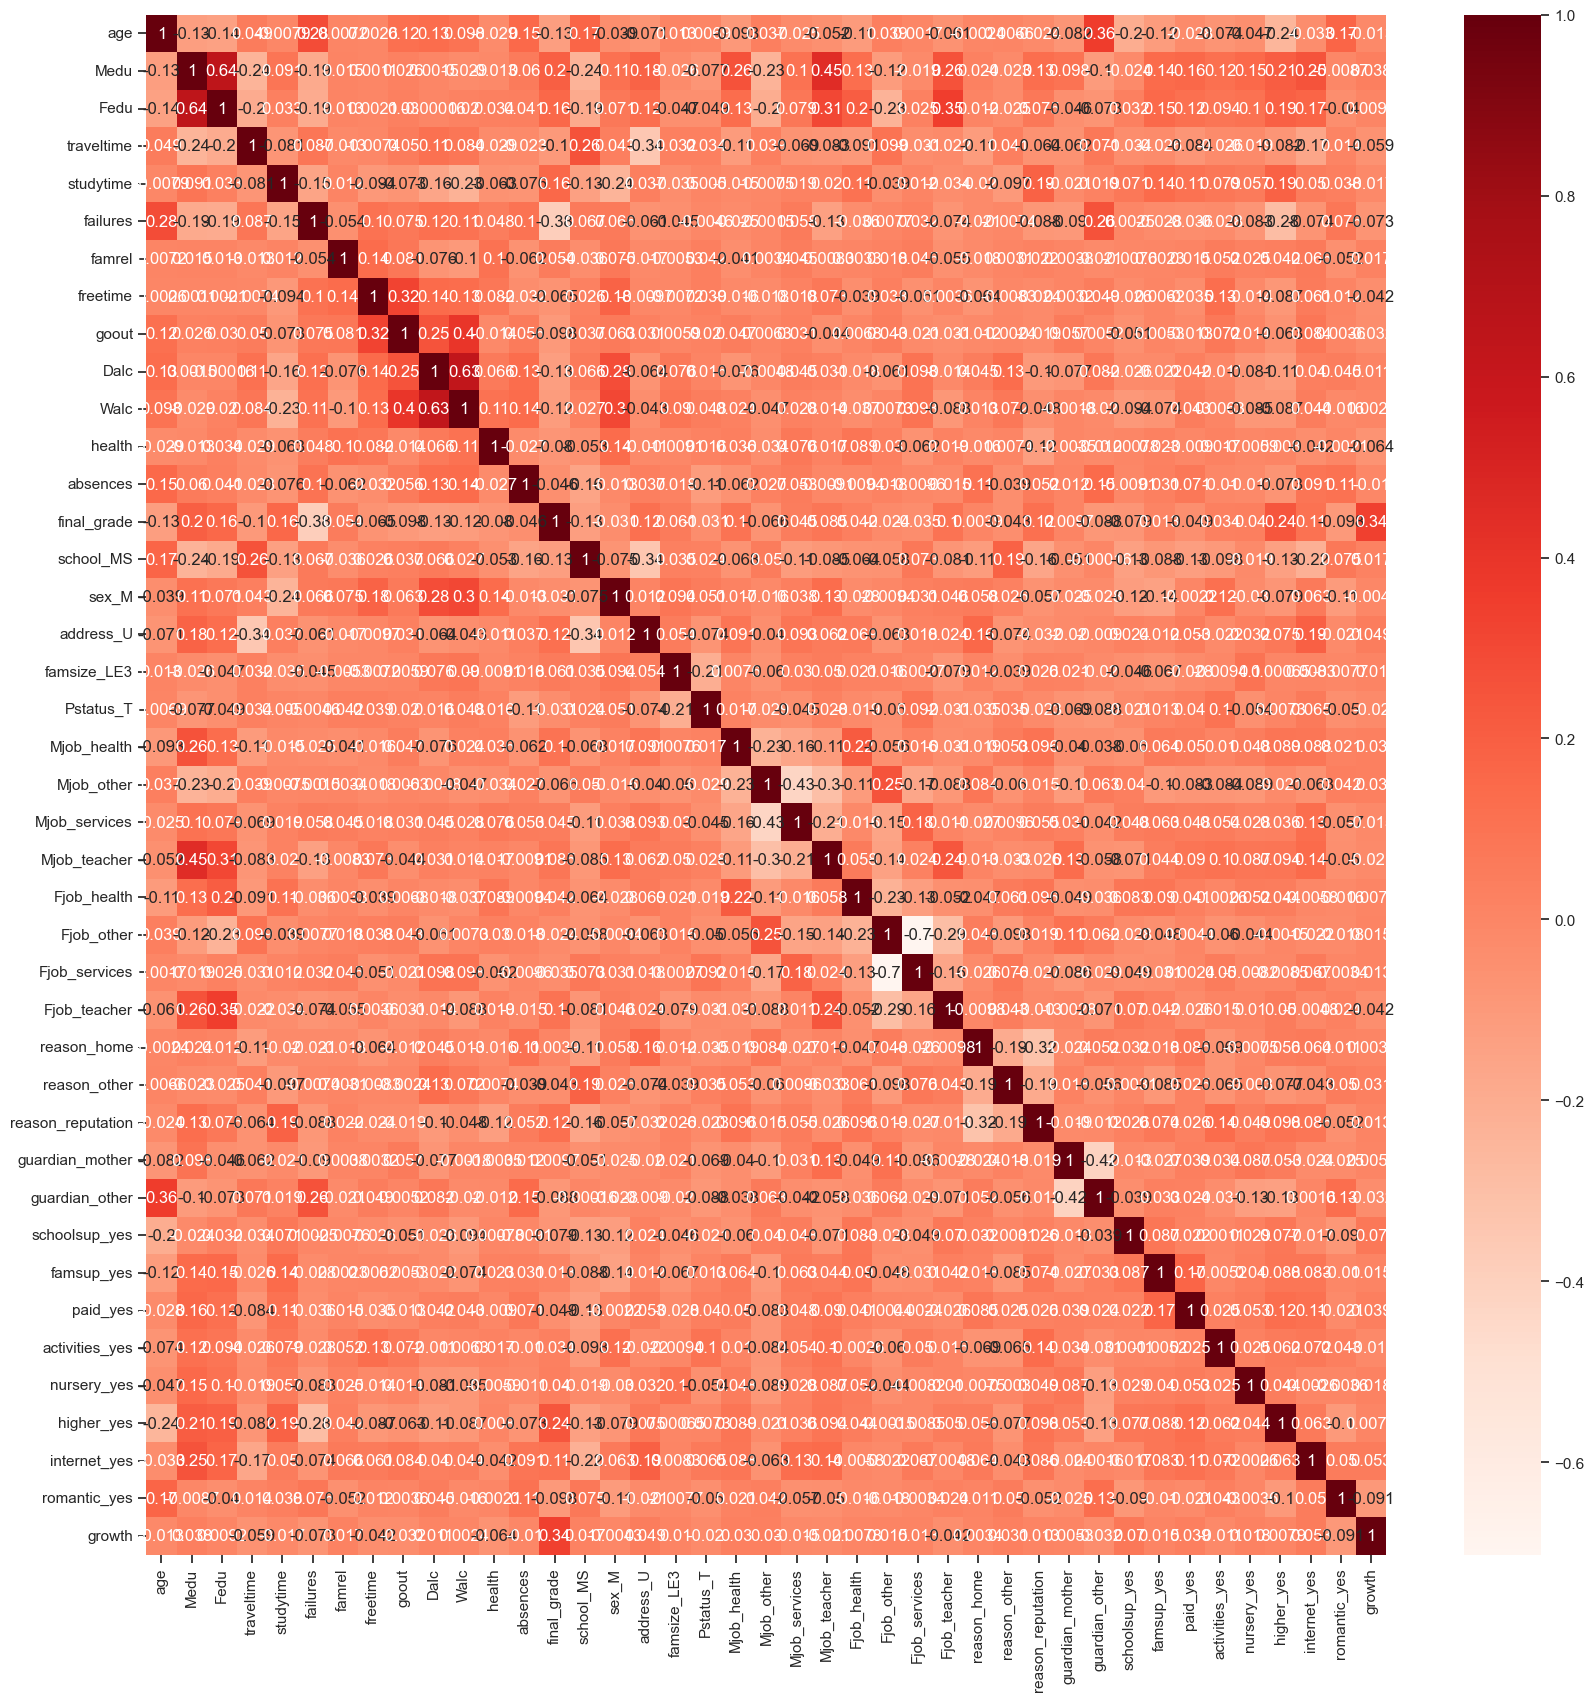

age                  0.125282
Medu                 0.201472
Fedu                 0.159796
traveltime           0.102627
studytime            0.161629
failures             0.383145
Dalc                 0.129642
Walc                 0.115740
school_MS            0.127114
address_U            0.117696
Mjob_health          0.101349
Fjob_teacher         0.101361
reason_reputation    0.121303
higher_yes           0.236578
internet_yes         0.107064
growth               0.341705
Name: final_grade, dtype: float64

In [138]:
# creating a correlation matrix to investigate what variables might contribute collinearity
plt.figure(figsize=(20, 20))
cor_data = student_data
cor = cor_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# filtering matrix to show only variables with correlation greater than 0.1 and correlation less than -0.1
cor_target = abs(cor['final_grade'])
relevant_features = cor_target[cor_target>0.1]
relevant_features = relevant_features[relevant_features<1]

relevant_features




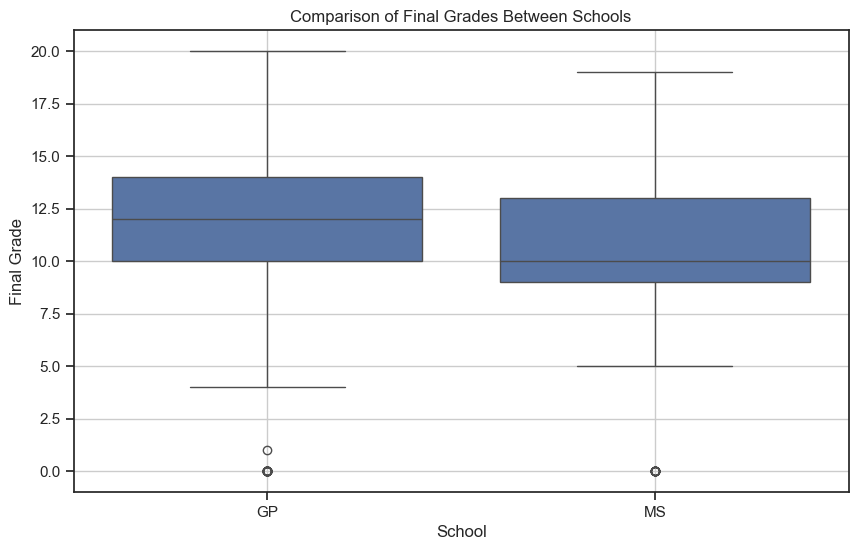

In [54]:
# exporting new student_data as a csv file
student_data.to_csv('student_data.csv', index=False)

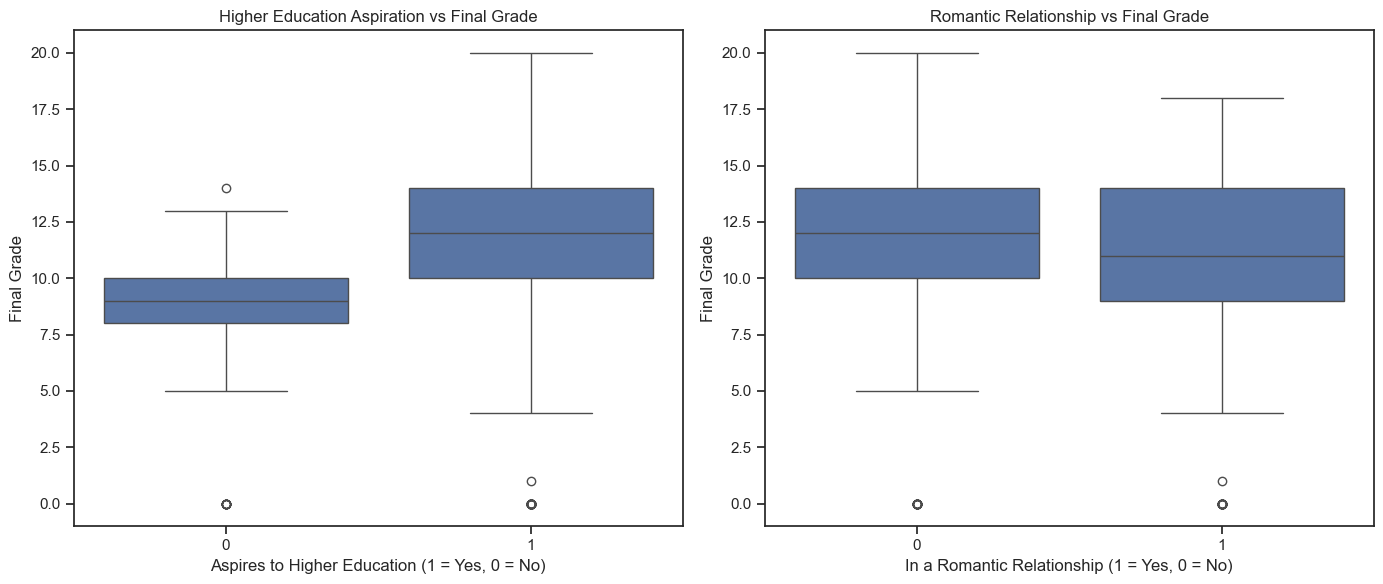

In [65]:
# Box plots for categorical variables
plt.figure(figsize=(14, 6))

# Box plot for higher education aspiration
plt.subplot(1, 2, 1)
sns.boxplot(x='higher_yes', y='final_grade', data=student_data)
plt.title('Higher Education Aspiration vs Final Grade')
plt.xlabel('Aspires to Higher Education (1 = Yes, 0 = No)')
plt.ylabel('Final Grade')

# Box plot for romantic relationship
plt.subplot(1, 2, 2)
sns.boxplot(x='romantic_yes', y='final_grade', data=student_data)
plt.title('Romantic Relationship vs Final Grade')
plt.xlabel('In a Romantic Relationship (1 = Yes, 0 = No)')
plt.ylabel('Final Grade')

plt.tight_layout()
plt.show()

Higher Education Aspiration tends to lead to a better final grade - makes sense!
Not being in a relationship has a slightly higher mean final grade?? funny

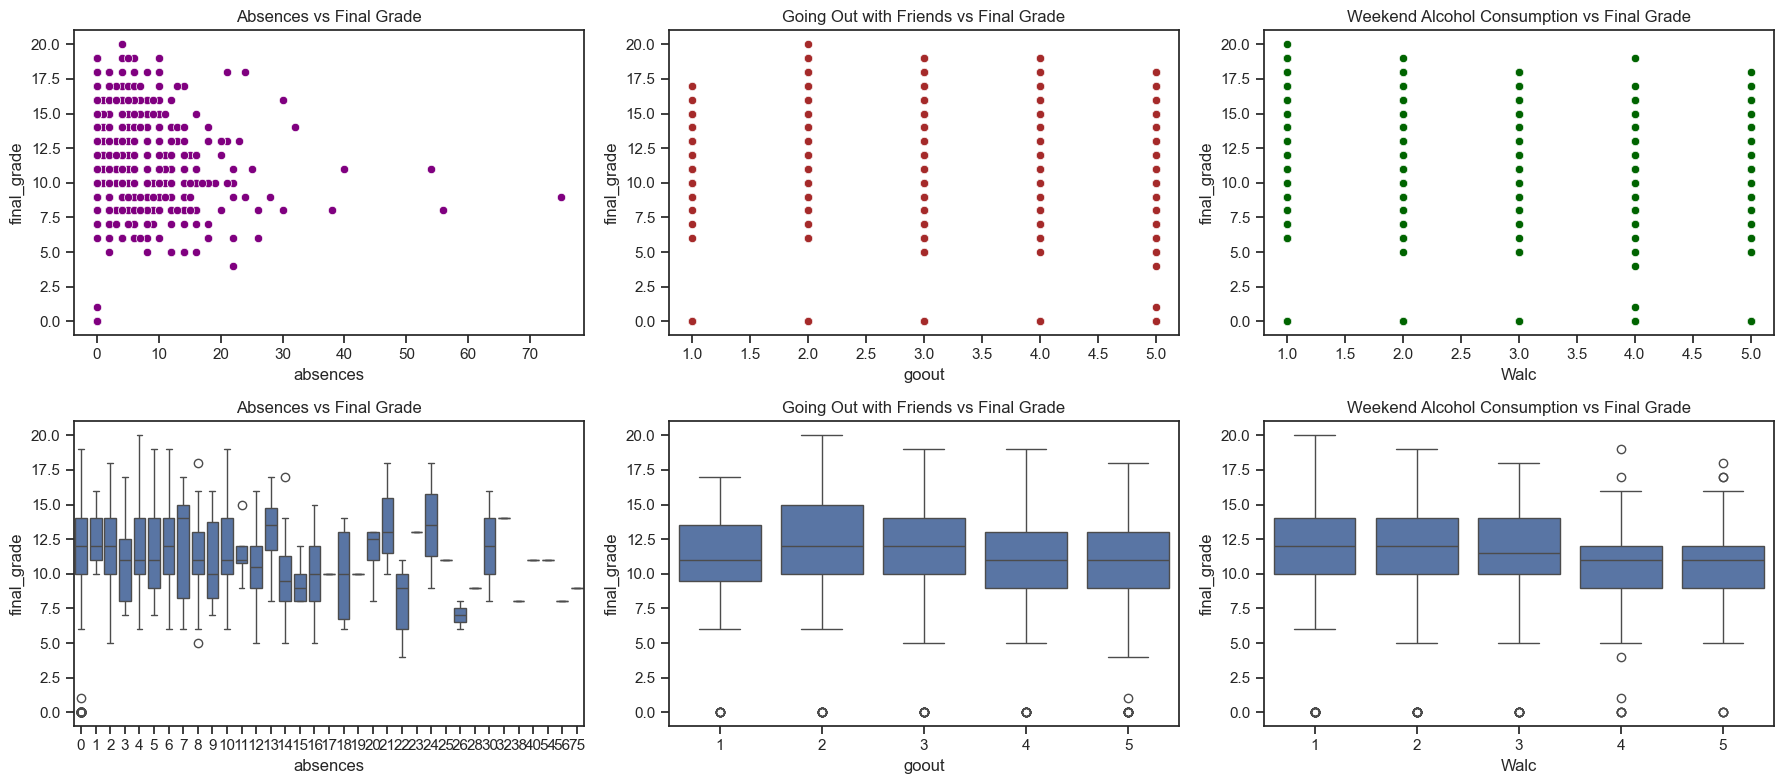

In [66]:
# Scatter plots and box plots for absences, goout, and Walc

plt.figure(figsize=(18, 8))

# Scatter plot for absences vs final_grade
plt.subplot(2, 3, 1)
sns.scatterplot(x='absences', y='final_grade', data=student_data, color='purple')
plt.title('Absences vs Final Grade')

# Scatter plot for goout vs final_grade
plt.subplot(2, 3, 2)
sns.scatterplot(x='goout', y='final_grade', data=student_data, color='brown')
plt.title('Going Out with Friends vs Final Grade')

# Scatter plot for Walc vs final_grade
plt.subplot(2, 3, 3)
sns.scatterplot(x='Walc', y='final_grade', data=student_data, color='darkgreen')
plt.title('Weekend Alcohol Consumption vs Final Grade')

# Box plot for absences vs final_grade
plt.subplot(2, 3, 4)
sns.boxplot(x='absences', y='final_grade', data=student_data)
plt.title('Absences vs Final Grade')

# Box plot for goout vs final_grade
plt.subplot(2, 3, 5)
sns.boxplot(x='goout', y='final_grade', data=student_data)
plt.title('Going Out with Friends vs Final Grade')

# Box plot for Walc vs final_grade
plt.subplot(2, 3, 6)
sns.boxplot(x='Walc', y='final_grade', data=student_data)
plt.title('Weekend Alcohol Consumption vs Final Grade')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Absences vs Final Grade')

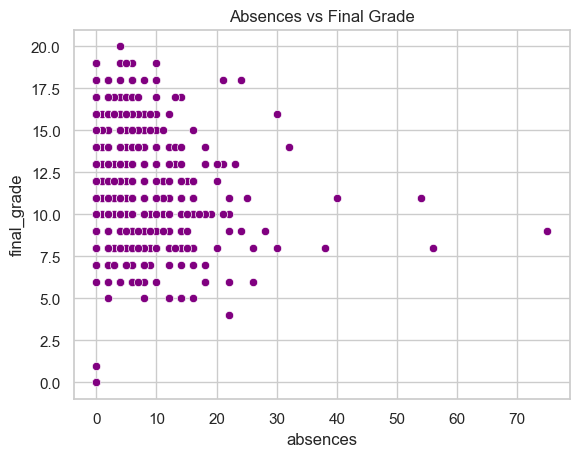

In [149]:
sns.scatterplot(x='absences', y='final_grade', data=student_data, color='purple')
plt.title('Absences vs Final Grade')

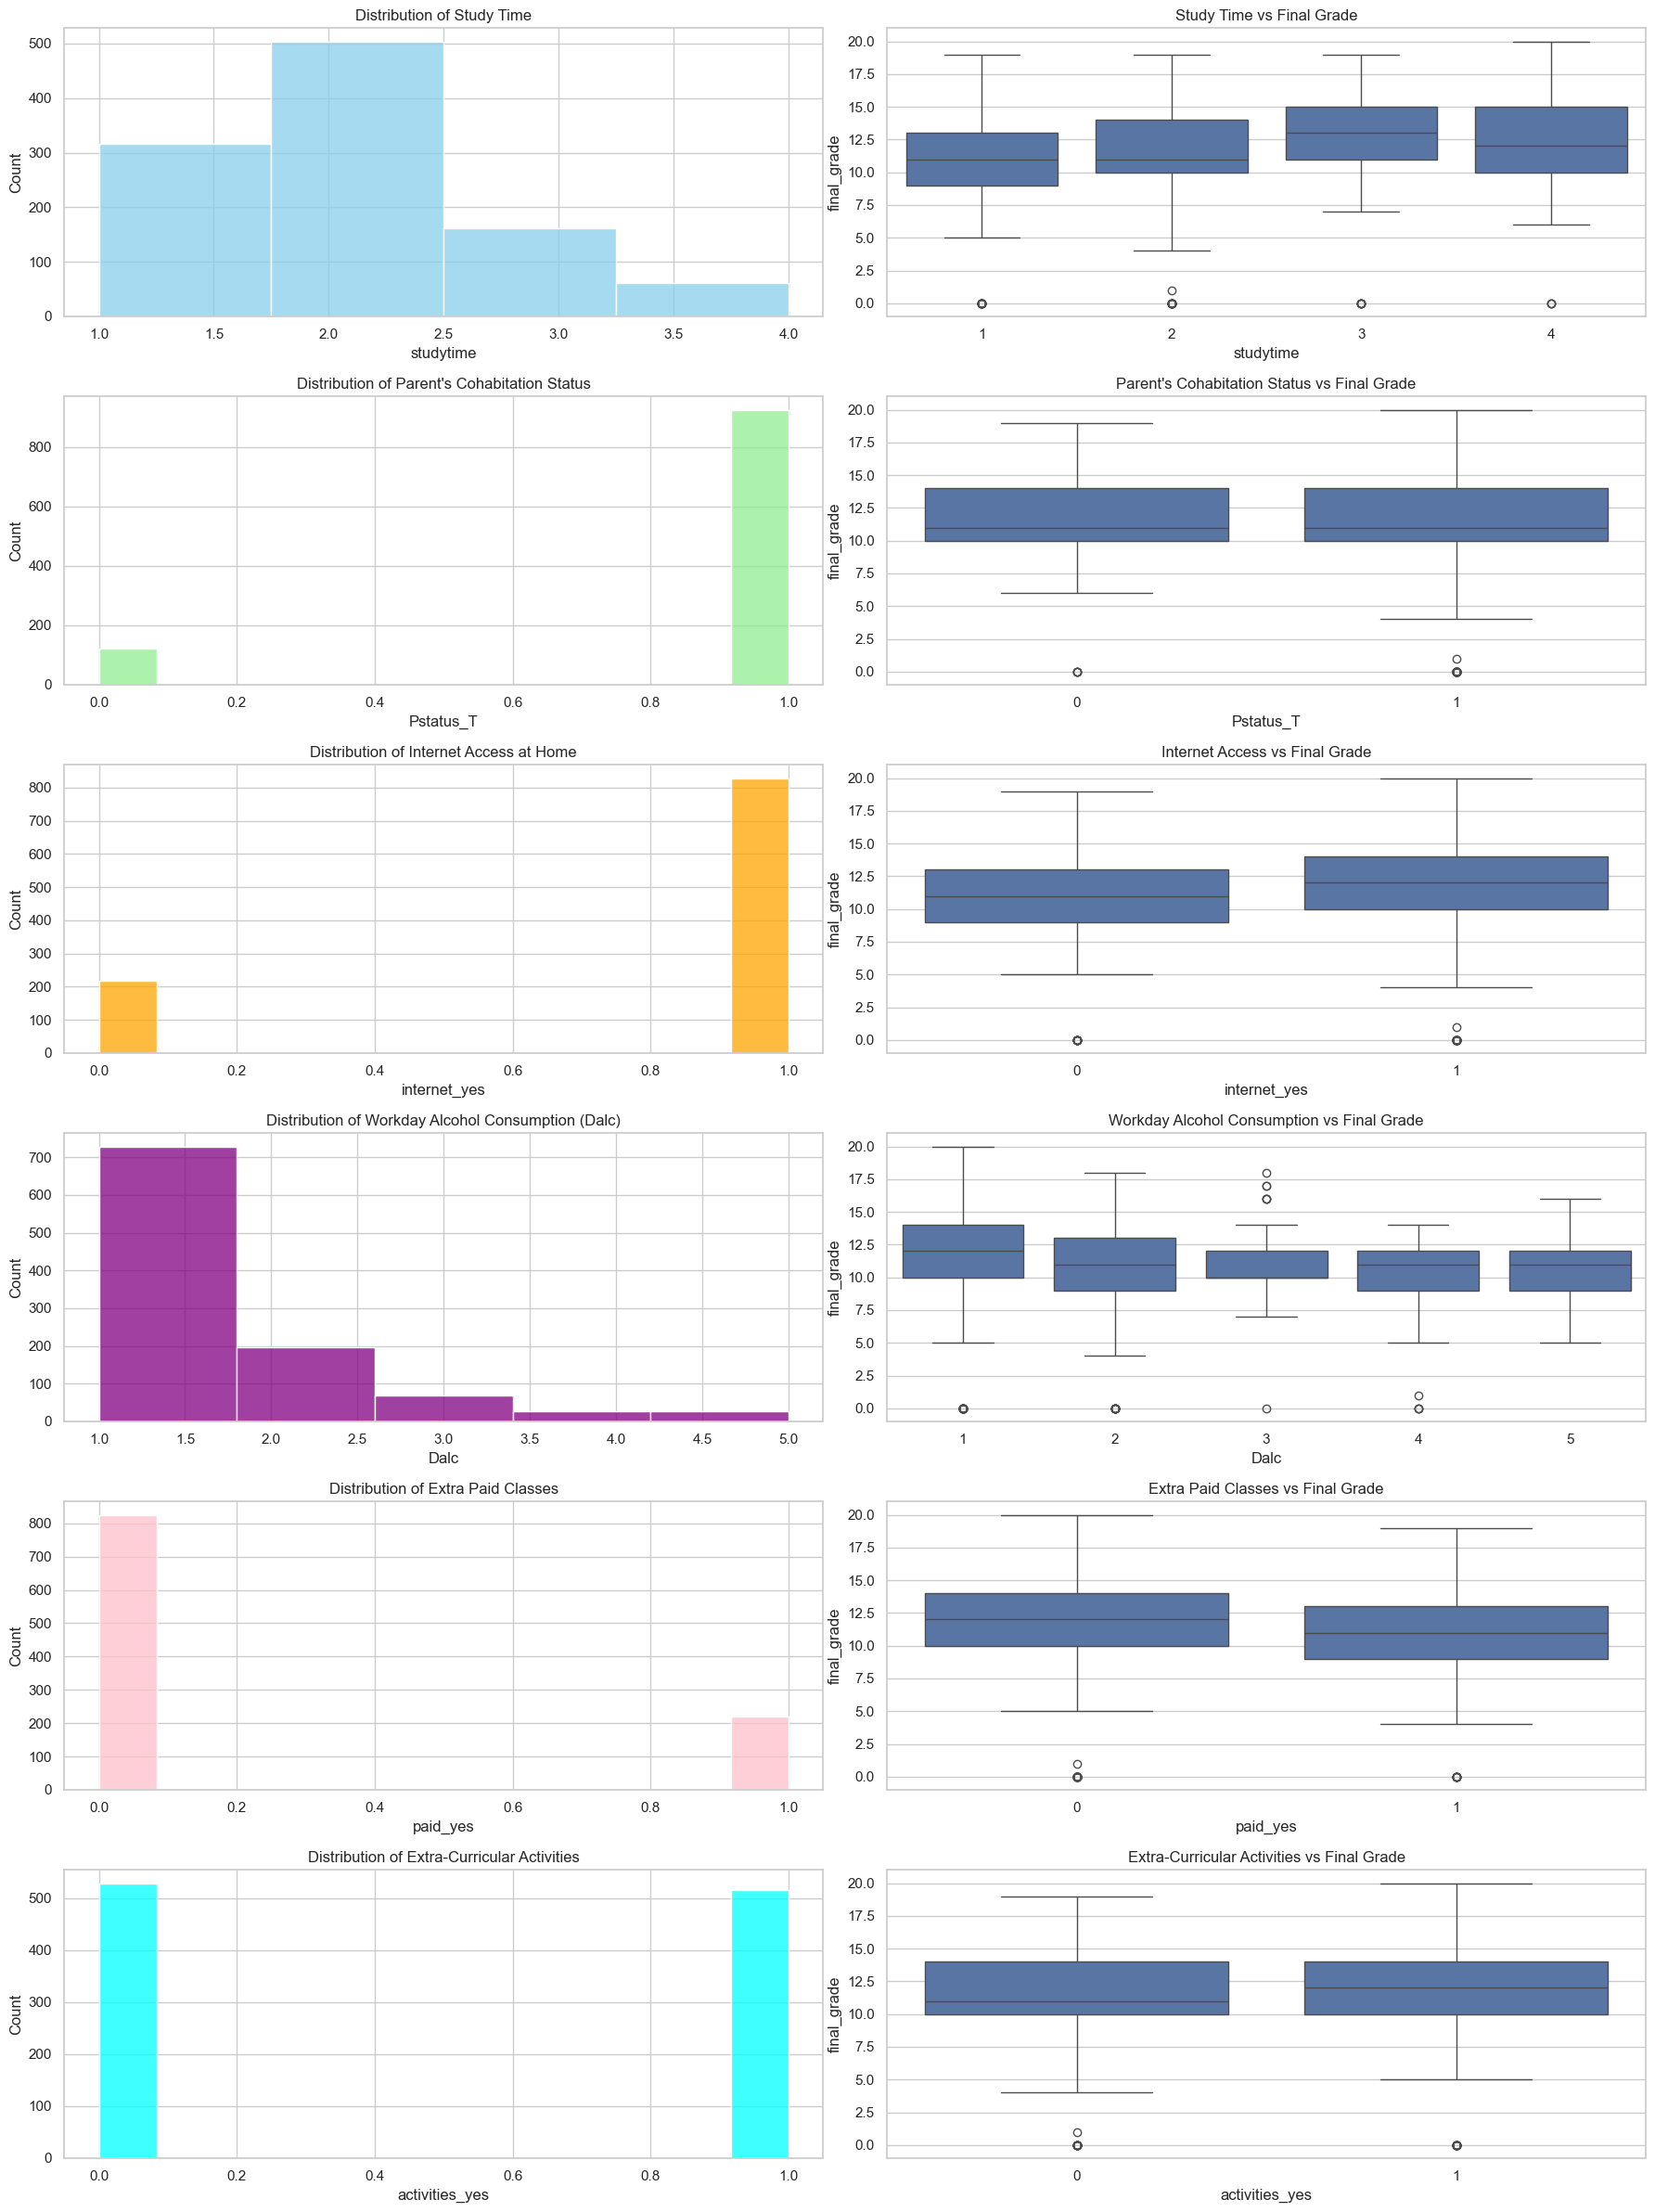

<Figure size 640x480 with 0 Axes>

In [150]:
# Setting up the plot canvas
plt.figure(figsize=(18, 24))

# Studytime distribution and its relation to final grade
plt.subplot(6, 2, 1)
sns.histplot(student_data['studytime'], bins=4, kde=False, color='skyblue')
plt.title('Distribution of Study Time')

plt.subplot(6, 2, 2)
sns.boxplot(x='studytime', y='final_grade', data=student_data)
plt.title('Study Time vs Final Grade')

# Parent's cohabitation status (Pstatus)
plt.subplot(6, 2, 3)
sns.histplot(student_data['Pstatus_T'], kde=False, color='lightgreen')
plt.title('Distribution of Parent\'s Cohabitation Status')

plt.subplot(6, 2, 4)
sns.boxplot(x='Pstatus_T', y='final_grade', data=student_data)
plt.title('Parent\'s Cohabitation Status vs Final Grade')

# Internet access at home
plt.subplot(6, 2, 5)
sns.histplot(student_data['internet_yes'], kde=False, color='orange')
plt.title('Distribution of Internet Access at Home')

plt.subplot(6, 2, 6)
sns.boxplot(x='internet_yes', y='final_grade', data=student_data)
plt.title('Internet Access vs Final Grade')

# Workday alcohol consumption (Dalc)
plt.subplot(6, 2, 7)
sns.histplot(student_data['Dalc'], bins=5, kde=False, color='purple')
plt.title('Distribution of Workday Alcohol Consumption (Dalc)')

plt.subplot(6, 2, 8)
sns.boxplot(x='Dalc', y='final_grade', data=student_data)
plt.title('Workday Alcohol Consumption vs Final Grade')

# Extra paid classes (paid)
plt.subplot(6, 2, 9)
sns.histplot(student_data['paid_yes'], kde=False, color='pink')
plt.title('Distribution of Extra Paid Classes')

plt.subplot(6, 2, 10)
sns.boxplot(x='paid_yes', y='final_grade', data=student_data)
plt.title('Extra Paid Classes vs Final Grade')

# Extra-curricular activities (activities)
plt.subplot(6, 2, 11)
sns.histplot(student_data['activities_yes'], kde=False, color='cyan')
plt.title('Distribution of Extra-Curricular Activities')

plt.subplot(6, 2, 12)
sns.boxplot(x='activities_yes', y='final_grade', data=student_data)
plt.title('Extra-Curricular Activities vs Final Grade')

plt.tight_layout()
plt.show()

# exporting plot as image
plt.savefig('student_data_visualizations.png')

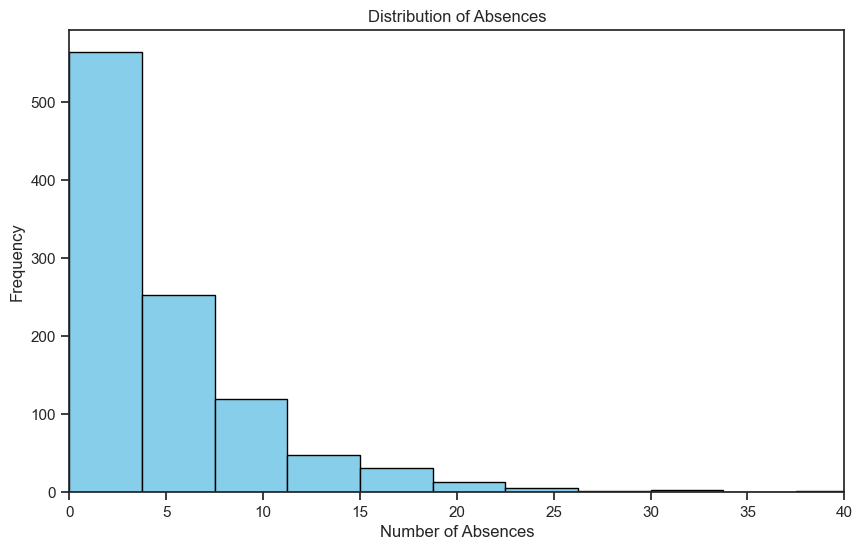

In [123]:

# shorten x-axis to see distribution better
plt.figure(figsize=(10, 6))
plt.hist(student_data['absences'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Absences')
plt.xlabel('Number of Absences')
plt.ylabel('Frequency')
plt.xlim(0, 40)
plt.show()

## BAGGING ##

In [130]:
from sklearn.model_selection import cross_val_score
# creating a bagging model to predict final_grade (final_grade is a numeric value 0-20 so this is a regression problem)
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


X = student_data.drop(columns = 'final_grade')
y = student_data['final_grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

# adding cross validation to bagging model

bagging = BaggingRegressor(random_state=15)

cv_scores = cross_val_score(bagging, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print(f'Bagging Cross Validation MSE: {-cv_scores.mean()}')
# bagging cross validation RMSE
print(f'Bagging Cross Validation RMSE: {np.sqrt(-cv_scores.mean())}')


bagging.fit(X_train, y_train)
y_pred = bagging.predict(X_test)
print(f'Bagging MSE: {mean_squared_error(y_test, y_pred)}')
# Bagging RMSE
print(f'Bagging RMSE: {mean_squared_error(y_test, y_pred, squared=False)}')
# calculating the R-squared value
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

Bagging Cross Validation MSE: 9.647552077357048
Bagging Cross Validation RMSE: 3.106050881321336
Bagging MSE: 9.967057748538013
Bagging RMSE: 3.1570647361969018


/Users/quinlanoconnell/PycharmProjects/MIS381 - DSP/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.41905290317542077

In [146]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Splitting the data
X = student_data.drop(columns='final_grade')
y = student_data['final_grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

# Defining the hyperparameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

# Initializing the Bagging Regressor
bagging = BaggingRegressor(random_state=15)

# Setting up GridSearchCV
grid_search = GridSearchCV(estimator=bagging, param_grid=param_grid, 
                           cv=5, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)

# Fitting the model with the best parameters
grid_search.fit(X_train, y_train)

# Best parameters found by GridSearchCV
print(f'Best parameters found: {grid_search.best_params_}')

# Predicting with the best model
best_bagging = grid_search.best_estimator_
y_pred = best_bagging.predict(X_test)

# Calculating the test set metrics
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
print(f'Tuned Bagging Test MSE: {test_mse}')
print(f'Tuned Bagging Test RMSE: {test_rmse}')

# Calculating the R-squared value on the test set
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; tota

In [131]:
# calculating the feature importances
importances = np.zeros(X_train.shape[1])

for tree in bagging.estimators_:
    importances += tree.feature_importances_
    
importances /= len(bagging.estimators_)
feature_importance = dict(zip(X.columns, importances))

sorted_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

for feature, importance in sorted_importance:
    print(f"{feature}: {importance:.4f}")
    

failures: 0.1744
growth: 0.1582
absences: 0.0964
freetime: 0.0374
goout: 0.0357
schoolsup_yes: 0.0354
age: 0.0335
Medu: 0.0321
health: 0.0284
Fedu: 0.0279
Walc: 0.0272
studytime: 0.0268
paid_yes: 0.0220
famrel: 0.0205
traveltime: 0.0164
Fjob_teacher: 0.0159
Fjob_services: 0.0148
higher_yes: 0.0147
Dalc: 0.0127
reason_reputation: 0.0117
Mjob_teacher: 0.0114
school_MS: 0.0111
Mjob_services: 0.0111
guardian_other: 0.0109
address_U: 0.0108
activities_yes: 0.0102
romantic_yes: 0.0092
Mjob_other: 0.0089
internet_yes: 0.0080
famsize_LE3: 0.0079
guardian_mother: 0.0078
reason_other: 0.0071
reason_home: 0.0070
Pstatus_T: 0.0069
nursery_yes: 0.0068
famsup_yes: 0.0066
sex_M: 0.0065
Fjob_other: 0.0054
Mjob_health: 0.0038
Fjob_health: 0.0005


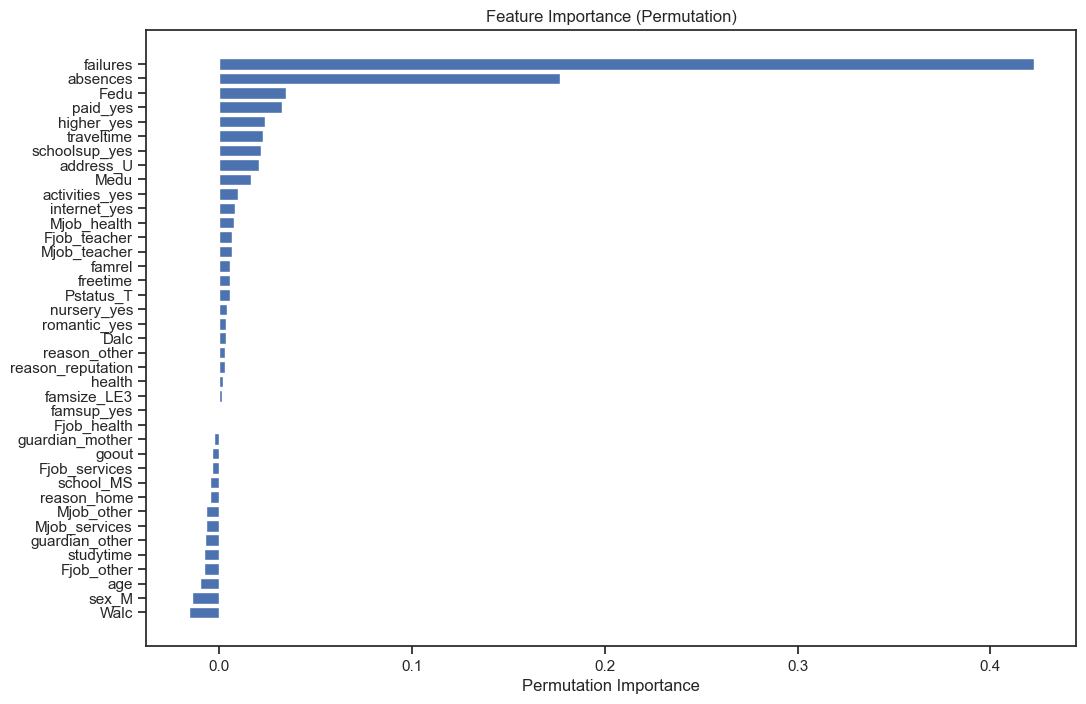

In [97]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Calculate permutation feature importance
perm_importance = permutation_importance(bagging, X_test, y_test, n_repeats=10, random_state=15)
sorted_idx = perm_importance.importances_mean.argsort()

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx], align='center')
plt.xlabel('Permutation Importance')
plt.title('Feature Importance (Permutation)')
plt.show()


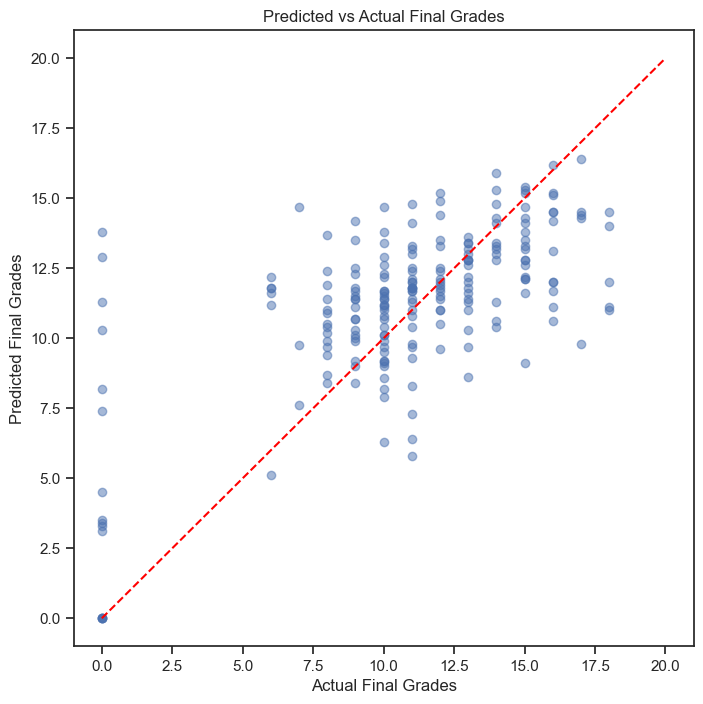

<Figure size 640x480 with 0 Axes>

In [132]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([0, 20], [0, 20], color='red', linestyle='--')  # Ideal 45-degree line
plt.title('Predicted vs Actual Final Grades')
plt.xlabel('Actual Final Grades')
plt.ylabel('Predicted Final Grades')
plt.show()

# save plot as a png file
plt.savefig('bagging_predicted_vs_actual.png')

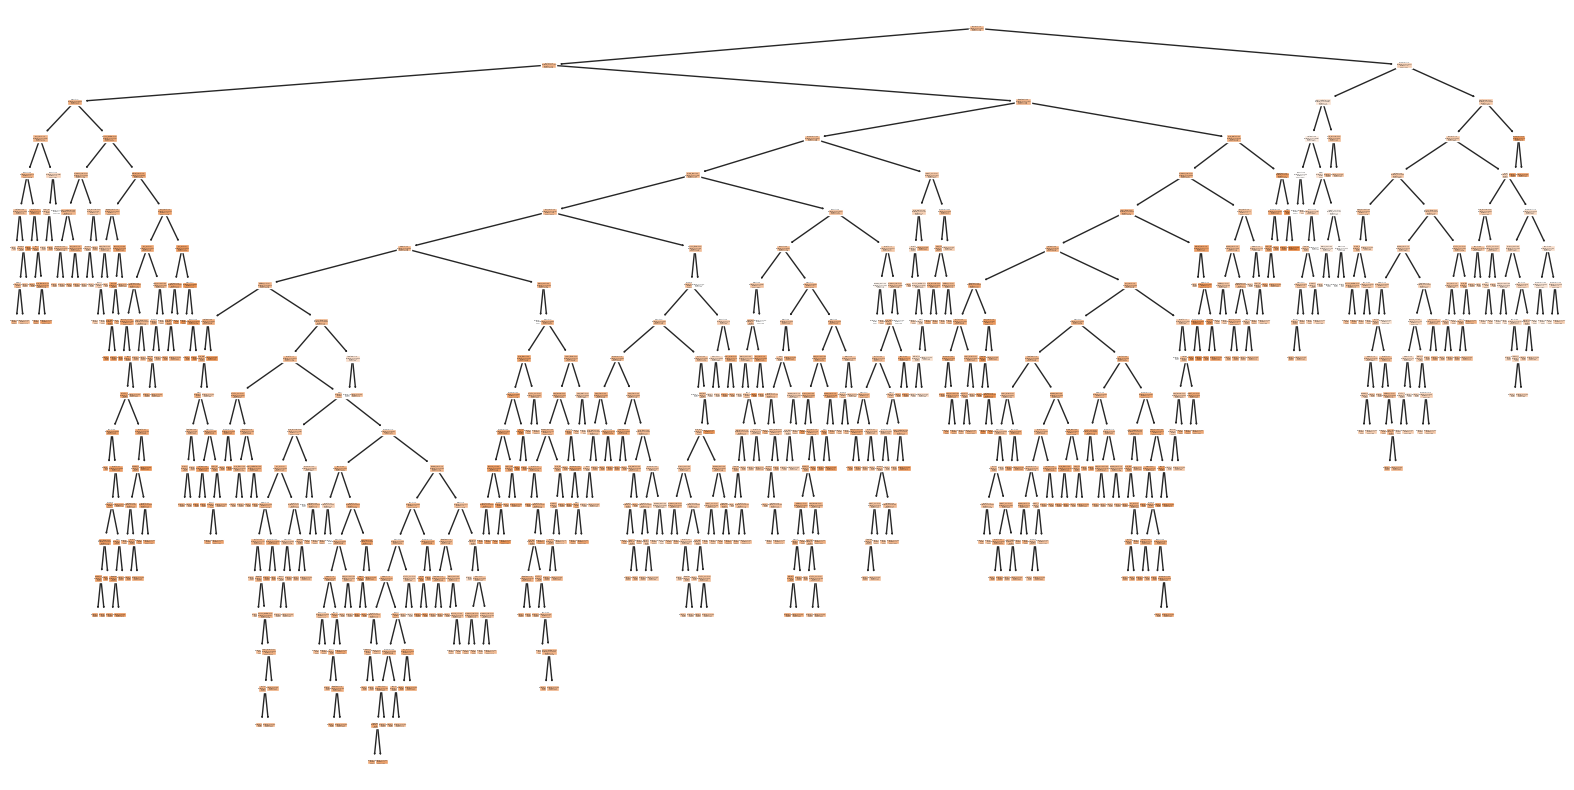

np.int64(5)

In [120]:
# visualize bagging model
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(bagging.estimators_[1], feature_names=X.columns, filled=True)
plt.show()

# finding what the first split of the bagging model is on
bagging.estimators_[1].tree_.feature[0]




## RANDOM FOREST ##

In [90]:
# creating a random forest model to predict on
from sklearn.ensemble import RandomForestRegressor

X = student_data.drop(columns = 'final_grade')
y = student_data['final_grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

rf = RandomForestRegressor(random_state=15)

cv_scores = cross_val_score(rf, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print(f'Random Forest Cross Validation MSE: {-cv_scores.mean()}')
# random forest cross validation RMSE
print(f'Random Forest Cross Validation RMSE: {np.sqrt(-cv_scores.mean())}')

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f'Random Forest MSE: {mean_squared_error(y_test, y_pred)}')
# Random Forest RMSE
print(f'Random Forest RMSE: {mean_squared_error(y_test, y_pred, squared=False)}')
# calculating the R-squared value
r2_score(y_test, y_pred)


Random Forest Cross Validation MSE: 10.40793743387216
Random Forest Cross Validation RMSE: 3.2261335114765726
Random Forest MSE: 13.032402859250398
Random Forest RMSE: 3.6100419470208926


/Users/quinlanoconnell/PycharmProjects/MIS381 - DSP/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.24038399327620896

In [144]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Splitting the data
X = student_data.drop(columns='final_grade')
y = student_data['final_grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

# Defining the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initializing the Random Forest Regressor
rf = RandomForestRegressor(random_state=15)

# Setting up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)

# Fitting the model with the best parameters
grid_search.fit(X_train, y_train)

# Best parameters found by GridSearchCV
print(f'Best parameters found: {grid_search.best_params_}')

# Predicting with the best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Calculating the test set metrics
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
print(f'Tuned Random Forest Test MSE: {test_mse}')
print(f'Tuned Random Forest Test RMSE: {test_rmse}')

# Calculating the R-squared value on the test set
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Tuned Random Forest Test MSE: 9.50839647384527
Tuned Random Forest Test RMSE: 3.083568788570359
R-squared: 0.44578676412828766


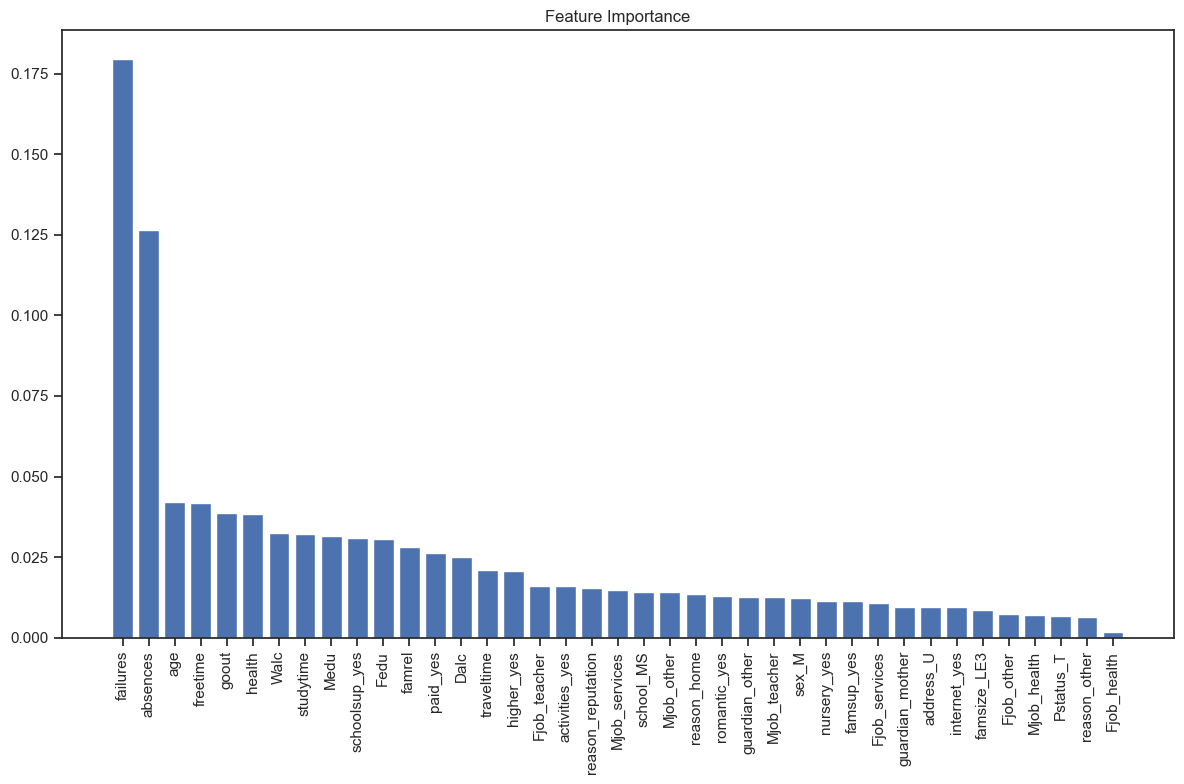

In [91]:
import matplotlib.pyplot as plt
import numpy as np

# Extract feature importances from the random forest model
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

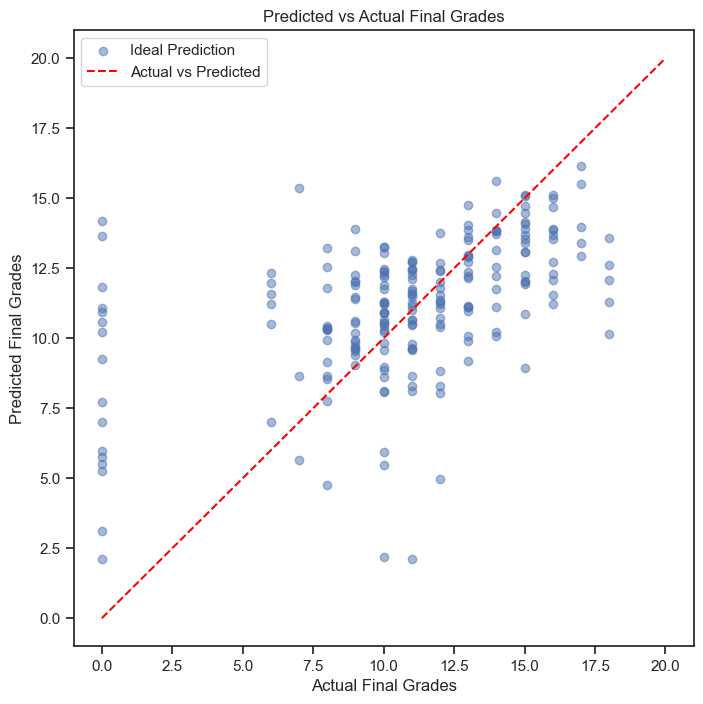

In [93]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([0, 20], [0, 20], color='red', linestyle='--')  # Ideal 45-degree line
plt.title('Predicted vs Actual Final Grades')
plt.xlabel('Actual Final Grades')
plt.ylabel('Predicted Final Grades')
plt.legend(['Ideal Prediction', 'Actual vs Predicted'])
plt.show()

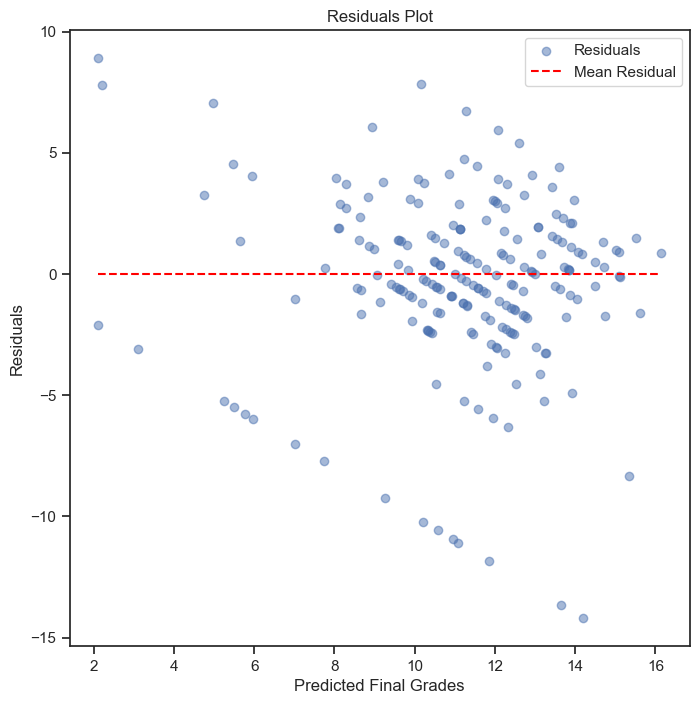

In [95]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 8))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), colors='red', linestyles='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Final Grades')
plt.ylabel('Residuals')
plt.legend(['Residuals', 'Mean Residual'])
plt.show()


## KNN ##

In [100]:
# running a KNN model to predict final grade
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

cv_scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print(f'KNN Cross Validation MSE: {-cv_scores.mean()}')
# KNN cross validation RMSE
print(f'KNN Cross Validation RMSE: {np.sqrt(-cv_scores.mean())}')

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f'KNN MSE: {mean_squared_error(y_test, y_pred)}')
# KNN RMSE
print(f'KNN RMSE: {mean_squared_error(y_test, y_pred, squared=False)}')
# calculating the R-squared value

r2_score(y_test, y_pred)

KNN Cross Validation MSE: 13.805341939185315
KNN Cross Validation RMSE: 3.715554055478848
KNN MSE: 15.779904306220097
KNN RMSE: 3.972392768372747


/Users/quinlanoconnell/PycharmProjects/MIS381 - DSP/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.08024114777373326

## LINEAR REGRESSION ##

In [103]:
# creating a multiple linear regression to predict final_grade from all predictors
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

cv_scores = cross_val_score(lm, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print(f'Linear Regression Cross Validation MSE: {-cv_scores.mean()}')
# Linear Regression cross validation RMSE
print(f'Linear Regression Cross Validation RMSE: {np.sqrt(-cv_scores.mean())}')

lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
print(f'Linear Regression MSE: {mean_squared_error(y_test, y_pred)}')
# Linear Regression RMSE
print(f'Linear Regression RMSE: {mean_squared_error(y_test, y_pred, squared=False)}')
# calculating the R-squared value
r2_score(y_test, y_pred)


Linear Regression Cross Validation MSE: 11.8303429916742
Linear Regression Cross Validation RMSE: 3.4395265650484808
Linear Regression MSE: 14.723756649152435
Linear Regression RMSE: 3.837154759604105


/Users/quinlanoconnell/PycharmProjects/MIS381 - DSP/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.14180052975700086

In [104]:
# seeing which predictors from the linear regression are statistically significant
import statsmodels.api as sm

X_train = sm.add_constant(X_train)
lm = sm.OLS(y_train, X_train).fit()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            final_grade   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     7.080
Date:                Sat, 10 Aug 2024   Prob (F-statistic):           3.50e-31
Time:                        22:34:59   Log-Likelihood:                -2170.3
No. Observations:                 835   AIC:                             4421.
Df Residuals:                     795   BIC:                             4610.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                10.1013      2.203      4.586      0.000       5.777      14.425
age                   0.0418      0.112      0.372      0.710      -0.179       0.262
Medu                  0.2952      0.174      1.696      0.090      -0.046       0.637
Fedu                  0.0093      0.154      0.060      0.952      -0.294       0.313
traveltime           -0.0141      0.183     -0.077      0.939      -0.373       0.345
studytime             0.3535      0.155      2.278      0.023       0.049       0.658
failures             -1.7456      0.199     -8.788      0.000      -2.135      -1.356
famrel                0.2624      0.131      1.999      0.046       0.005       0.520
freetime              0.1052      0.123      0.855      0.393      -0.136       0.347
goout                -0.1025      0.119     -0.860      0.390      -0.337       0.132
Dalc                 -0.2279      0.174     -1.309      0.191      -0.570       0.114
Walc                 -0.0357      0.131     -0.272      0.786      -0.293       0.222
health               -0.2190      0.087     -2.522      0.012      -0.389      -0.049
absences             -0.0053      0.021     -0.250      0.803      -0.047       0.036
school_MS            -0.6199      0.325     -1.908      0.057      -1.258       0.018
sex_M                -0.1549      0.276     -0.560      0.575      -0.698       0.388
address_U             0.1085      0.299      0.363      0.716      -0.478       0.695
famsize_LE3           0.2697      0.267      1.009      0.313      -0.255       0.794
Pstatus_T            -0.2646      0.383     -0.692      0.489      -1.015       0.486
Mjob_health           0.4118      0.615      0.669      0.503      -0.796       1.619
Mjob_other           -0.4536      0.364     -1.248      0.213      -1.167       0.260
Mjob_services         0.1687      0.429      0.393      0.694      -0.673       1.010
Mjob_teacher         -0.4212      0.569     -0.741      0.459      -1.537       0.695
Fjob_health          -0.1398      0.803     -0.174      0.862      -1.716       1.436
Fjob_other           -0.3070      0.525     -0.584      0.559      -1.338       0.724
Fjob_services        -0.6544      0.551     -1.188      0.235      -1.736       0.427
Fjob_teacher          1.0740      0.735      1.462      0.144      -0.368       2.516
reason_home          -0.0127      0.313     -0.041      0.968      -0.626       0.601
reason_other          0.1371      0.429      0.320      0.749      -0.705       0.979
reason_reputation     0.1870      0.321      0.583      0.560      -0.443       0.817
guardian_mother      -0.1217      0.297     -0.410      0.682      -0.705       0.461
guardian_other        0.2099      0.574      0.366      0.715      -0.916       1.336
schoolsup_yes        -1.2974      0.385     -3.366      0.001      -2.054

## GRADIENT BOOSTING ##

In [ ]:
#gradient boosting
from sklearn.ensemble import GradientBoostingRegressor

boost = GradientBoostingRegressor(n_estimators=5, max_depth=5, random_state=15)
boost_model = boost.fit(X_train, y_train)

# feature_importance = gb.feature_importances_

y_pred = boost_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print(rmse)

#feature importance
feature_importance = boost_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df[:5]

## Exploring the effect of adding one variable about the student's first period grade! ##

In [106]:
data2 = pd.read_csv('added_student_data.csv')

# dropping the G1 and G2 columns
data2 = data2.drop(columns=['G2'])

# renaming the G3 column to final_grade
data2 = data2.rename(columns={'G3': 'final_grade'})
# dummy encoding the categorical variables
data2 = pd.get_dummies(data2, drop_first=True).astype(int)

data2


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,1,0,0,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,0,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,20,2,2,1,2,2,5,5,4,4,...,0,1,0,1,1,0,1,1,0,0
1040,17,3,1,2,1,0,2,4,5,3,...,1,0,0,0,0,0,0,1,1,0
1041,21,1,1,1,1,3,5,5,3,3,...,0,1,0,0,0,0,0,1,0,0
1042,18,3,2,3,1,0,4,4,1,3,...,1,0,0,0,0,0,0,1,1,0


Testing Bagging Model but with G1 Predictor Added

In [107]:
from sklearn.metrics import root_mean_squared_error

X = data2.drop(columns = 'final_grade')
y = data2['final_grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

# adding cross validation to bagging model

bagging = BaggingRegressor(random_state=15)

cv_scores = cross_val_score(bagging, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print(f'Bagging Cross Validation MSE: {-cv_scores.mean()}')
# bagging cross validation RMSE
print(f'Bagging Cross Validation RMSE: {np.sqrt(-cv_scores.mean())}')


bagging.fit(X_train, y_train)
y_pred = bagging.predict(X_test)
print(f'Bagging MSE: {mean_squared_error(y_test, y_pred)}')
# Bagging RMSE
print(f'Bagging RMSE: {root_mean_squared_error(y_test, y_pred)}')
# calculating the R-squared value
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

Bagging Cross Validation MSE: 4.688738007067954
Bagging Cross Validation RMSE: 2.165349396071672
Bagging MSE: 6.789463051568315
Bagging RMSE: 2.6056598111741898


0.604264473195721

In [108]:
# testing random forest model with g1 predictor added
rf = RandomForestRegressor(random_state=15)

cv_scores = cross_val_score(rf, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print(f'Random Forest Cross Validation MSE: {-cv_scores.mean()}')
# random forest cross validation RMSE
print(f'Random Forest Cross Validation RMSE: {np.sqrt(-cv_scores.mean())}')

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f'Random Forest MSE: {mean_squared_error(y_test, y_pred)}')
# Random Forest RMSE
print(f'Random Forest RMSE: {root_mean_squared_error(y_test, y_pred)}')
# calculating the R-squared value
r2_score(y_test, y_pred)

Random Forest Cross Validation MSE: 4.537891249106183
Random Forest Cross Validation RMSE: 2.1302326748752547
Random Forest MSE: 5.9111397643540675
Random Forest RMSE: 2.431283563131637


0.6554590560559823

In [81]:
# RMSE went from 3.6955 down to 2.606!
# percentage decrease in RMSE
(3.6955 - 2.606) / 3.6955 * 100
# 30% decrease in RMSE, much better chance at predicting grade properly

29.48180219185496

In [83]:
# calculating the feature importances
importances = np.zeros(X_train.shape[1])

for tree in bagging.estimators_:
    importances += tree.feature_importances_
    
importances /= len(bagging.estimators_)
feature_importance = dict(zip(X.columns, importances))

sorted_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

for feature, importance in sorted_importance:
    print(f"{feature}: {importance:.4f}")
    
# MASSIVE importance of G1
    

G1: 0.6657
absences: 0.0690
health: 0.0203
goout: 0.0185
failures: 0.0165
activities_yes: 0.0159
age: 0.0135
famrel: 0.0133
Fedu: 0.0121
freetime: 0.0117
Walc: 0.0113
Medu: 0.0105
Dalc: 0.0099
paid_yes: 0.0085
studytime: 0.0085
famsize_LE3: 0.0078
nursery_yes: 0.0076
schoolsup_yes: 0.0071
romantic_yes: 0.0067
reason_home: 0.0067
traveltime: 0.0058
Mjob_services: 0.0046
school_MS: 0.0042
internet_yes: 0.0042
address_U: 0.0042
famsup_yes: 0.0038
Mjob_teacher: 0.0031
sex_M: 0.0030
reason_reputation: 0.0030
higher_yes: 0.0030
Mjob_health: 0.0028
guardian_mother: 0.0028
Fjob_other: 0.0024
Fjob_services: 0.0022
Mjob_other: 0.0020
guardian_other: 0.0020
Pstatus_T: 0.0018
reason_other: 0.0017
Fjob_teacher: 0.0011
Fjob_health: 0.0009


Trying with G2 also !!!

In [109]:
data3 = pd.read_csv('added_student_data.csv')

# dropping the G1 and G2 columns, ALL PREDICTORS
#data3 = data3.drop(columns=['G2'])

# renaming the G3 column to final_grade
data3 = data3.rename(columns={'G3': 'final_grade'})
# dummy encoding the categorical variables
data3 = pd.get_dummies(data3, drop_first=True).astype(int)

data3

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,1,0,0,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,0,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,20,2,2,1,2,2,5,5,4,4,...,0,1,0,1,1,0,1,1,0,0
1040,17,3,1,2,1,0,2,4,5,3,...,1,0,0,0,0,0,0,1,1,0
1041,21,1,1,1,1,3,5,5,3,3,...,0,1,0,0,0,0,0,1,0,0
1042,18,3,2,3,1,0,4,4,1,3,...,1,0,0,0,0,0,0,1,1,0


In [110]:
from sklearn.metrics import root_mean_squared_error

X = data3.drop(columns = 'final_grade')
y = data3['final_grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

# adding cross validation to bagging model

bagging = BaggingRegressor(random_state=15)

cv_scores = cross_val_score(bagging, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print(f'Bagging Cross Validation MSE: {-cv_scores.mean()}')
# bagging cross validation RMSE
print(f'Bagging Cross Validation RMSE: {np.sqrt(-cv_scores.mean())}')


bagging.fit(X_train, y_train)
y_pred = bagging.predict(X_test)
print(f'Bagging MSE: {mean_squared_error(y_test, y_pred)}')
# Bagging RMSE
print(f'Bagging RMSE: {root_mean_squared_error(y_test, y_pred)}')
# calculating the R-squared value
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

Bagging Cross Validation MSE: 2.528084911072863
Bagging Cross Validation RMSE: 1.5899952550472793
Bagging MSE: 2.7589473684210533
Bagging RMSE: 1.6610079374948974


0.8391900092872316

In [86]:
# RMSE went from 2.606 down to 1.661!
# percentage decrease in RMSE
(2.606 - 1.661) / 2.606 * 100
# another 36% decrease in RMSE, much better chance at predicting grade properly

36.262471220260935

In [87]:
# calculating the feature importances
importances = np.zeros(X_train.shape[1])

for tree in bagging.estimators_:
    importances += tree.feature_importances_
    
importances /= len(bagging.estimators_)
feature_importance = dict(zip(X.columns, importances))

sorted_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

for feature, importance in sorted_importance:
    print(f"{feature}: {importance:.4f}")

G2: 0.8131
absences: 0.0531
health: 0.0134
studytime: 0.0100
G1: 0.0096
Dalc: 0.0079
freetime: 0.0068
age: 0.0068
failures: 0.0064
Fedu: 0.0064
goout: 0.0060
Medu: 0.0055
Fjob_services: 0.0053
guardian_other: 0.0045
guardian_mother: 0.0040
famrel: 0.0040
traveltime: 0.0039
romantic_yes: 0.0036
activities_yes: 0.0030
Walc: 0.0029
schoolsup_yes: 0.0026
reason_home: 0.0025
paid_yes: 0.0025
Fjob_other: 0.0021
Mjob_services: 0.0018
internet_yes: 0.0016
famsize_LE3: 0.0013
Pstatus_T: 0.0012
Mjob_other: 0.0011
sex_M: 0.0009
higher_yes: 0.0009
Mjob_teacher: 0.0009
reason_reputation: 0.0008
reason_other: 0.0006
school_MS: 0.0006
nursery_yes: 0.0006
address_U: 0.0006
Mjob_health: 0.0004
famsup_yes: 0.0004
Fjob_health: 0.0003
Fjob_teacher: 0.0001


In [111]:
# testing random forest model with g2 and g1 added
rf = RandomForestRegressor(random_state=15)

cv_scores = cross_val_score(rf, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print(f'Random Forest Cross Validation MSE: {-cv_scores.mean()}')
# random forest cross validation RMSE
print(f'Random Forest Cross Validation RMSE: {np.sqrt(-cv_scores.mean())}')

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f'Random Forest MSE: {mean_squared_error(y_test, y_pred)}')
# Random Forest RMSE
print(f'Random Forest RMSE: {root_mean_squared_error(y_test, y_pred)}')
# calculating the R-squared value
r2_score(y_test, y_pred)

Random Forest Cross Validation MSE: 2.3366230808950084
Random Forest Cross Validation RMSE: 1.5286016750268883
Random Forest MSE: 2.4381205741626797
Random Forest RMSE: 1.561448229741441


0.8578899505748476